# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [1]:
! git clone https://www.github.com/DS3001/assignment2

Cloning into 'assignment2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 36 (delta 9), reused 29 (delta 6), pack-reused 0
Receiving objects: 100% (36/36), 5.47 MiB | 28.71 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [2]:
import numpy as np
import pandas as pd

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

The paper is about creating a framework for organizing data, called the “tidy dataset”. This framework organizes datasets in the same structural way; these organized datasets can then be called “tidy”. This allows for tools to be developed that can transform smelt any messy dataset into a tidy one.

2. Read the introduction. What is the "tidy data standard" intended to accomplish?

The tidy data standard is intended to make the initial analysis of data easier; the author acknowledges that further steps will have to be taken to fully analyze the data, but having a tidy dataset gives you something to start with. Most importantly, the tidy data standard is intended to allow data sets and data tools to work well together without requiring you to translate the outputs of one to get it into the correct input format for another.

3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

The first sentence means that tidy datasets all share similar traits: they all have a structure that conveys the meaning and organization of the data (e.g. all tidy datasets have a separate table for each organizational unit). But, untidy datasets are not consistent; each one could have a different problem/organizational issue that makes it not fit the tidy data standard. This is why it’s so hard to work with untidy data.

The second sentence means that in the context of the data collection, you can usually tell whether something was a variable (something that might have affected an observation, but that wasn’t the actual value you were observing) or not. But, in general, a characteristic that sometimes would be a variable (like height) may actually be an observation. Everything depends on the context of your data collection.

4. Read Section 2.2. How does Wickham define values, variables, and observations?

A value is a piece of data (either a number or a string); each cell in a table contains one value. Meanwhile, a variable is the collection of values from different observations that all measure some attribute. For example, a variable could be “height” and consist of the observed heights of many different people. Finally, an observation is the set of values measured for one observational unit; the values will span all the attributes that the dataset deals with. For example, if you’re observing people, one observation will consist of all the attribute values you measured from a single person.

5. How is "Tidy Data" defined in section 2.3?

Tidy data is defined as data whose structure conveys its meaning. Tidy datasets have one row for each observation, one column for each variable, and one table for each type of observational unit.

6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

The five most common problems with messy datasets are:
1. some columns of a table are actually values of a variable, so there isn’t a single column for that variable
2. multiple observational units are put in one table
3. observations of one observational unit are split among multiple tables
4. one column holds multiple variables
5. variables are stored in rows and columns, not just columns.

The data in table 4 are messy because there is a column for each value of the “income” variable, when instead, there should be one column titled “income” that holds all those values. Melting a dataset is when you take the variable values that made up multiple columns and put them all in one column for that variable; you end up with more rows in the table, because each observation now is on its own row, rather than you storing multiple observations (one for each variable value) in the same row.

7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Table 11 is messy for two reasons. First, it has the values of the “date” variable as separate columns, when those should be separate observations in one column. Second, two separate variables, “tmax” and “tmin”, are stored as values in the same column, when they should be two separate columns. Table 12 is tidy because it fixes both of these issues. It is molten because it melted the dataset to fix the date issue, and it became fully tidy once tmax and tmin were pulled into separate columns.

8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

The chicken and egg problem is that we can become so dependent on the tools that help us work with tidy data that the two become linked. This can mean that you have to improve both to make marked improvements to working with tidy data as a whole. For example, even if you make the data tidier, you’ll have to adjust your tools to match the new format of the data. Wickham hopes that future work will take into account the human/cognitive side of data wrangling to make the design of tidy data more user friendly/intuitive.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

1. Numeric variable: For ./data/airbnb_hw.csv, clean the Price variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

In [106]:
# first I loaded the data
airbnb = pd.read_csv('./assignment2/data/airbnb_hw.csv')

In [107]:
# then I examined the price variable -- I saw that it was getting treated as a non-numeric variable
print(airbnb['Price'].describe())
# I looked at the unique values in 'Price' to see if I could tell what was causing that
print(airbnb['Price'].unique())

count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object
['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '15

In [108]:
# I believe that the commas in values over 1,000 are making this variable get treated as a string

# So, I removed the commas
airbnb['Price'] = airbnb['Price'].str.replace(',', '')
# and converted the variable to numeric
airbnb['Price'] = pd.to_numeric(airbnb['Price'])

In [109]:
# Then I checked to make sure that the variable was now numeric
print(airbnb['Price'].describe(), '\n')

# and I made sure that there wee no null or NA values in the variable
print(airbnb['Price'].isnull().sum() + airbnb['Price'].isna().sum())

# since there are no null values and since the variable is now numeric, I believe it is fully cleaned!

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

0


2. Categorical variable: For the ./data/sharks.csv data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.

In [8]:
# first I loaded the data
sharks = pd.read_csv('./assignment2/data/sharks.csv')

<ipython-input-8-ca3a298e4d52>:2: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sharks = pd.read_csv('./assignment2/data/sharks.csv')


In [9]:
# then I examined the type of the variable
print(sharks['Type'].describe(), '\n')
# and the different values it has
sharks['Type'].unique()

count           6457
unique            12
top       Unprovoked
freq            4716
Name: Type, dtype: object 



array(['Unprovoked', 'Provoked', 'Questionable', 'Watercraft',
       'Unconfirmed', 'Unverified', 'Invalid', 'Under investigation',
       'Boating', 'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [10]:
# Several of the values seem similar, so I'm going to combine groups of similar values into one
# First, "Boat" will represent the "Boating", "Boat", and "Boatomg" values (I believe that Boatomg is a typo)
# "Unverified" will represent the "Unverified", "Questionable", and "Unconfirmed" values
# I kept "under investifation" as its own category, because that indicates that the status of the attack might be updated later,
# whereas other "unconfirmed" cases might not get investigated
# a watercraft could be different enough from boat that I kept it as its own category (a jetki is a watercraft, for ex)

def consolodate_attack_type_values(original_value):
  if original_value == "Unconfirmed" or original_value == "Questionable":
    return "Unverified"
  if original_value == "Boating" or original_value == "Boatomg":
    return "Boat"
  if original_value == "Under investigation":
    return "Under Investigation" # I wanted to make the value name capital to be consistent
  return original_value

sharks['Type'] = sharks['Type'].apply(consolodate_attack_type_values)

In [11]:
# check that the transformation worked
sharks['Type'].unique()

array(['Unprovoked', 'Provoked', 'Unverified', 'Watercraft', 'Invalid',
       'Under Investigation', 'Boat', 'Sea Disaster', nan], dtype=object)

In [12]:
# see how many observations do not have an attack type
sharks['Type'].isna().sum()

5

In [13]:
# there are only five observations with a nan value, so it would make sense to simply remove them from the dataset
# however, I want to practice other ways of dealing with nan values
# since I don't know why the Type variable is missing for these observations, I will create a dummy variable to show which observations are missing it

sharks['Type_NAN'] = sharks['Type'].isna()

In [18]:
sharks["Type_NAN"].describe()

count      6462
unique        2
top       False
freq       6457
Name: Type_NAN, dtype: object

In [15]:
# Now I have dealt with missing values and have consolidated like values, so I think this variable is ready to use

3. Dummy variable: For the pretrial data covered in the lecture, clean the WhetherDefendantWasReleasedPretrial variable as well as you can, and, in particular, replace missing values with np.nan.

In [67]:
# load data -- this code modified from lecture notes
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
pretrial = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you

In [68]:
# inspect the relevant variable
print(pretrial['WhetherDefendantWasReleasedPretrial'].describe(), '\n')
print(pretrial['WhetherDefendantWasReleasedPretrial'].unique(), '\n')
print(pretrial['WhetherDefendantWasReleasedPretrial'].value_counts())

count    22986.000000
mean         0.845428
std          0.477276
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: WhetherDefendantWasReleasedPretrial, dtype: float64 

[9 0 1] 

1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64


In [69]:
# first I'm going to rename this variable, because the current name is so long that it's unwieldy
missing_values = pretrial['WhetherDefendantWasReleasedPretrial'] == 9
pretrial = pretrial.rename(columns = {'WhetherDefendantWasReleasedPretrial':'Released'})

In [70]:
# and I'll check that the rename worked:
# first, check that the old column name no longer exists
print('WhetherDefendantWasReleasedPretrial' in pretrial.columns)
# then check that the variable appears under its new name
print(pretrial['Released'].describe())

False
count    22986.000000
mean         0.845428
std          0.477276
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: Released, dtype: float64


In [71]:
# because 9 is the missing value code, I will replace all the 9s in the dataset with np.nan
missing_values = pretrial['Released'] == 9
pretrial.loc[missing_values, 'Released'] = np.nan
# I'll then confirm that the replacement worked
print(pretrial['Released'].value_counts())

1.0    19154
0.0     3801
Name: Released, dtype: int64


In [72]:
# finally, I'll make a dummy value to encode which rows have missing data for the 'WhetherDefendantWasReleasedPretrial' variable
pretrial['Released_NAN'] = pretrial['Released'].isna()
print(pretrial['Released_NAN'].value_counts())

False    22955
True        31
Name: Released_NAN, dtype: int64


4.
Missing values, not at random: For the pretrial data covered in the lecture, clean the ImposedSentenceAllChargeInContactEvent variable as well as you can, and explain the choices you make. (Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)

In [94]:
pretrial2 = pretrial.copy(deep=True)

In [95]:
# first, I examined the imposed sentence variable and saw that it was of type "object"
print(pretrial2['ImposedSentenceAllChargeInContactEvent'].describe(), '\n')
print(pretrial2['ImposedSentenceAllChargeInContactEvent'].unique())

count     22986
unique      484
top            
freq       9053
Name: ImposedSentenceAllChargeInContactEvent, dtype: object 

[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40' '284' '11' '118'

In [96]:
# one of the values for ImposedSentence was a space, which would not be able to be converted to a number
# I checked to see how many times this value occurred in the variable
print((pretrial2['ImposedSentenceAllChargeInContactEvent'] == ' ').sum())

9053


In [97]:
# next, I converted the variable to a numeric type and examined it
pretrial2['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(pretrial2['ImposedSentenceAllChargeInContactEvent'], errors='coerce')
print(pretrial2['ImposedSentenceAllChargeInContactEvent'].describe(), '\n')
print(pretrial2['ImposedSentenceAllChargeInContactEvent'].value_counts())

count    13933.000000
mean        19.899671
std         63.571627
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max       2208.000000
Name: ImposedSentenceAllChargeInContactEvent, dtype: float64 

0.000000     4953
12.000000    1404
0.985626     1051
6.000000      809
3.000000      787
             ... 
49.971253       1
57.034908       1
79.926078       1
42.164271       1
1.657084        1
Name: ImposedSentenceAllChargeInContactEvent, Length: 483, dtype: int64


In [98]:
# I checked to make sure that the spaces (and only the spaces) became nans
pretrial2["ImposedSentenceAllChargeInContactEvent"].isna().sum()

9053

In [99]:
# I can see that there are a lot of sentences of zero months, and there are also 9053 observations with no sentence
# I'll create a dummy variable for when there is a sentence of zero months
pretrial2["Sentence_Zero"] = pretrial2["ImposedSentenceAllChargeInContactEvent"] == 0
# and one for when there is no sentence
pretrial2["Sentence_NA"] = pretrial2["ImposedSentenceAllChargeInContactEvent"].isna()

In [100]:
# then, I'll cross-tabulate these dummy variablea with the SentenceType variable
print(pd.crosstab(pretrial2['Sentence_Zero'], pretrial2['SentenceTypeAllChargesAtConvictionInContactEvent']), '\n')
print(pd.crosstab(pretrial2['Sentence_NA'], pretrial2['SentenceTypeAllChargesAtConvictionInContactEvent']))

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
Sentence_Zero                                                               
False                                             3767  4299  914  8779  274
True                                              4953     0    0     0    0 

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
Sentence_NA                                                                 
False                                             8720  4299  914     0    0
True                                                 0     0    0  8779  274


In [101]:
# If the sentence type is 9, the sentence should be np.nan, because in that case, the data about sentence length is unknown
# Similarly, if the charges against the person were dropped, then of course there is no sentence to speak about
# So, it makes sense that all the sentences for people with sentence types 4 and 9 are NaN

In [102]:
# looking at the codebook, sentence type 0 means that the person was put on probation/not incarcerated
# this indicates a more minor crime, so it makes sense that this is the only category
# where people received a sentence of zero months
# in this case, a sentence was given, and we have information about it, but it was chosen to be zero months
# so, I think this value should NOT be replaced with NaN

# I examined the sentences given to people with this sentence type
pretrial2.loc[ pretrial2['SentenceTypeAllChargesAtConvictionInContactEvent'] == 0, 'ImposedSentenceAllChargeInContactEvent'].value_counts()

0.000000      4953
0.985626       765
12.000000      586
3.000000       442
6.000000       372
              ... 
158.000000       1
23.663244        1
227.000000       1
59.663244        1
0.459959         1
Name: ImposedSentenceAllChargeInContactEvent, Length: 176, dtype: int64

In [103]:
# the one thing I noticed was that some people still got a sentence despite not being incarcerated
# I think it would make more sense to set these people's sentence length as 0 (indicating that they were not sentenced to jail time)
# and then represent their probation time in its own variable, ProbationTime

# I made a new column for this variable, copying over the sentence times
pretrial2['ProbationTime'] = pretrial2['ImposedSentenceAllChargeInContactEvent'].copy()
# then made the probation time NaN for any sentence type that was not 0 (did not involve probation)
pretrial2.loc[ pretrial2['SentenceTypeAllChargesAtConvictionInContactEvent'] != 0, 'ProbationTime'] = np.nan
# finally, I reflected that all the people with sentence type 0 did not receive any jail time
pretrial2.loc[ pretrial2['SentenceTypeAllChargesAtConvictionInContactEvent'] == 0, 'ImposedSentenceAllChargeInContactEvent'] = 0.0

In [104]:
# finally, I made sure that the changes had been applied by re-running/running more cross tabulations
pretrial2["Sentence_Zero"] = pretrial2["ImposedSentenceAllChargeInContactEvent"] == 0
pretrial2["Sentence_NA"] = pretrial2["ImposedSentenceAllChargeInContactEvent"].isna()
pretrial2["Probation_Zero"] = pretrial2["ProbationTime"] == 0
pretrial2["Probation_NA"] = pretrial2["ProbationTime"].isna()

print(pd.crosstab(pretrial2['Sentence_Zero'], pretrial2['SentenceTypeAllChargesAtConvictionInContactEvent']), '\n')
print(pd.crosstab(pretrial2['Sentence_NA'], pretrial2['SentenceTypeAllChargesAtConvictionInContactEvent']), '\n')
print(pd.crosstab(pretrial2['Probation_Zero'], pretrial2['SentenceTypeAllChargesAtConvictionInContactEvent']), '\n')
print(pd.crosstab(pretrial2['Probation_NA'], pretrial2['SentenceTypeAllChargesAtConvictionInContactEvent']))

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
Sentence_Zero                                                               
False                                                0  4299  914  8779  274
True                                              8720     0    0     0    0 

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
Sentence_NA                                                                 
False                                             8720  4299  914     0    0
True                                                 0     0    0  8779  274 

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
Probation_Zero                                                              
False                                             3767  4299  914  8779  274
True                                              4953     0    0     0    0 

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     

In [105]:
# looks good!

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.

In [ ]:
# I loaded the data in question 2

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [110]:
print(airbnb.shape, '\n') # this reveals the dimensions of the data and tells me that there are 30,478 observations
print(airbnb.dtypes, '\n') # this tells me that the variables included are Host Id, Host Since, Name, Neighbourhood, Property Type, etc

print(airbnb.head())

(30478, 13) 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                           int64
Review Scores Rating          float64
dtype: object 

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Ty

3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [111]:
print(pd.crosstab(airbnb['Room Type'], airbnb['Property Type']))

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

In [112]:
# A general pattern I see is that small/isolated rentals, such as RVs and boats, tend to have guests rent the entire home/unit
# Meanwhile, large buildings, such as bed and breakfasts, castles, and chalets, tend to have guests rent a single room in the facility
# Medium-sized buildings, such as a house or a villa, could go either way

# Private rooms are more comman than renting an entire property for bed and breakfasts, castles, chalets, dorms, houses, huts, tents,
# treehouses, and anything that falls in the "other" category

4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.

<Axes: >

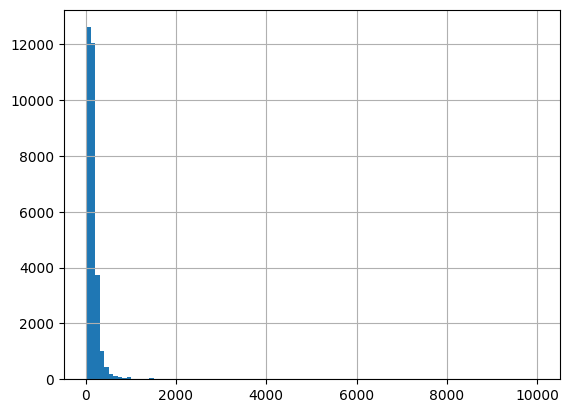

In [115]:
# histogram for price
airbnb["Price"].hist(bins=100) # this is hard to read because of the rare expensive listings (the data has a long tail)

<Axes: ylabel='Density'>

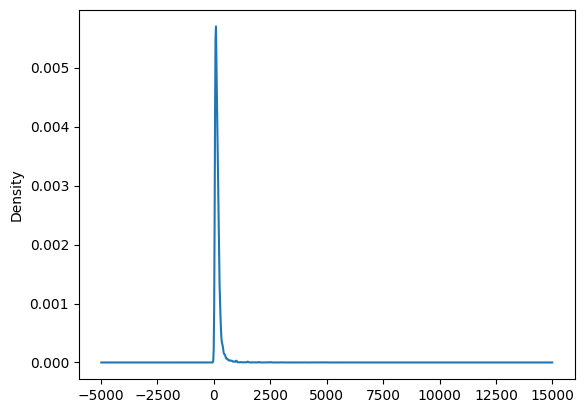

In [119]:
# kernel density for price
airbnb["Price"].plot.density()

<Axes: >

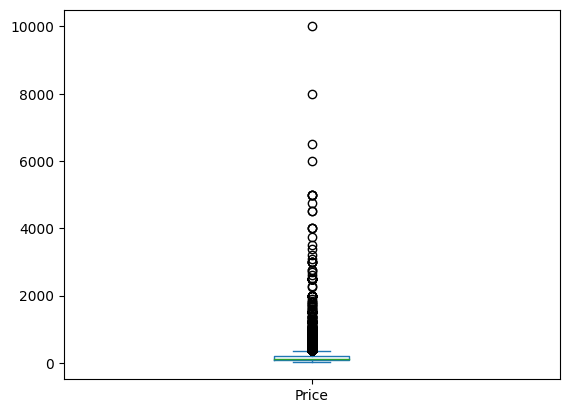

In [120]:
# box plot for price
airbnb["Price"].plot.box() # again, we can see that there are just a few data points above the $2,000 mark

<Axes: >

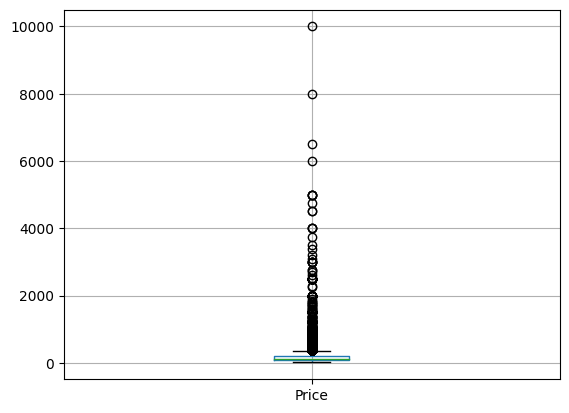

In [121]:
airbnb.boxplot(column="Price")

In [131]:
# statistical description for price
stats = airbnb["Price"].describe()

# just like in the EDA notebook, I'll compute the variance and interquartile range
# this code is inspired by the EDA notebook code
std = stats[2]
var = std**2
thirdQ = stats[6] # 75th percentile
firstQ = stats[4] # 25th percentile
iqr = thirdQ - firstQ

print(stats, '\n')
print('Variance: ', var)
print('Inter-quartile range: ', iqr)

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Variance:  39119.085673448484
Inter-quartile range:  115.0


In [126]:
# creation of price_log
airbnb["price_log"] = np.log(airbnb["Price"])

<Axes: >

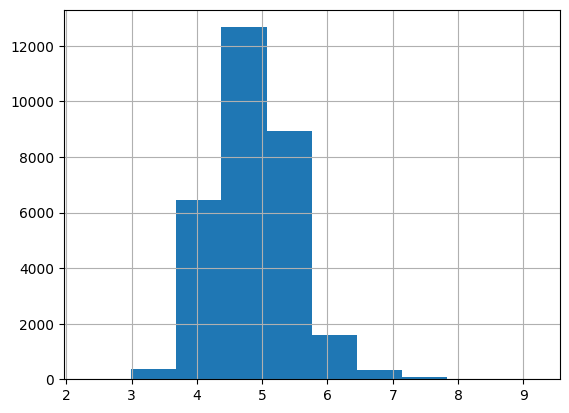

In [128]:
# histogram for price_log
airbnb["price_log"].hist() # since there are no negative or 0 price values, I don't have to worry about there being undefined log values

<Axes: ylabel='Density'>

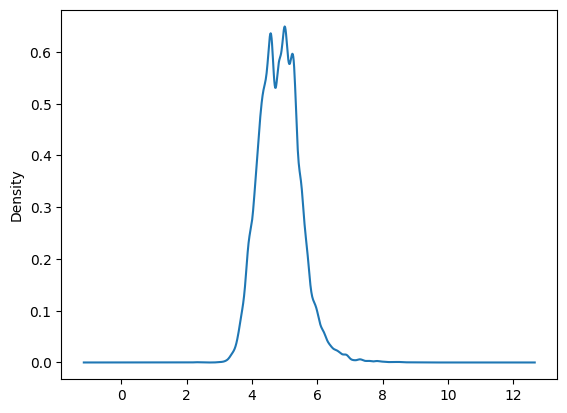

In [129]:
# kernel density for price_log
airbnb["price_log"].plot.density()

<Axes: >

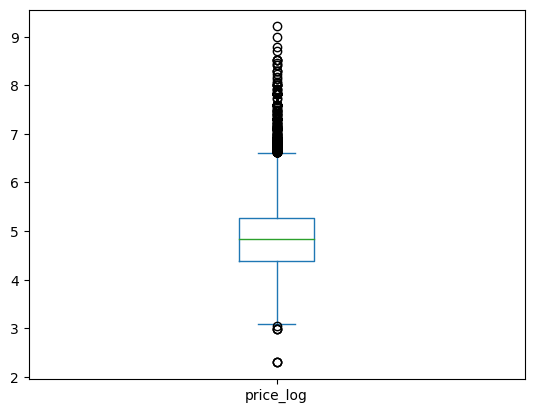

In [130]:
# box plot for price_log
airbnb["price_log"].plot.box()

In [133]:
# statistical description for price_log
log_stats = airbnb["price_log"].describe()

log_var = log_stats[2]**2
log_thirdQ = log_stats[6]
log_firstQ = log_stats[4]
log_iqr = log_thirdQ - log_firstQ

print(log_stats, '\n')
print('Variance: ', log_var)
print('Inter-quartile range: ', log_iqr)

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64 

Variance:  0.39401233246166956
Inter-quartile range:  0.8909729238898656


5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

<Axes: xlabel='price_log', ylabel='Beds'>

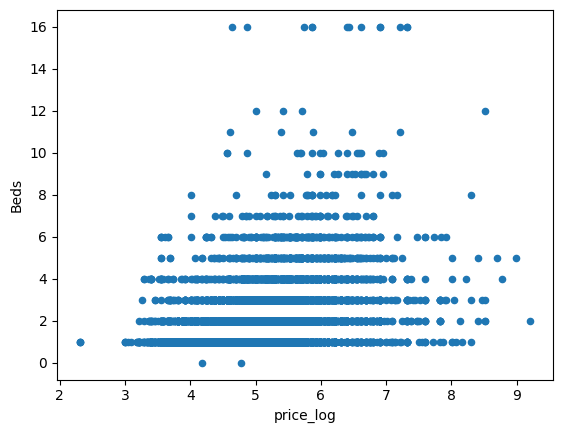

In [135]:
# scatterplot for price_log and beds
airbnb.plot.scatter(y='Beds',x='price_log')

In [ ]:
# interestingly, it looks like there's not a huge correlation between price and number of beds;
# even the listings with the most beds (16) are only around the middle of the price range
# meanwhile, there seems to be a very slight positive correlation between price and beds
 # (as the number of beds goes up, the mid-range of price goes up just slightly), but there's a huge price range on the smaller listings

In [136]:
airbnb.loc[:,['Beds','Price']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

In [137]:
# looking at the mean price for each number of beds, I can see a positive correlation
# between mean price and number of beds, though it's not exact (9 beds has a much higher average price than 10 beds, for example)
# the standard deviations jump all over the place, but it does seem that there is a very small positive correlation
# with number of beds. So, listings with more beds tend to have more varying prices.

6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [139]:
import seaborn as sns

<Axes: xlabel='price_log', ylabel='Beds'>

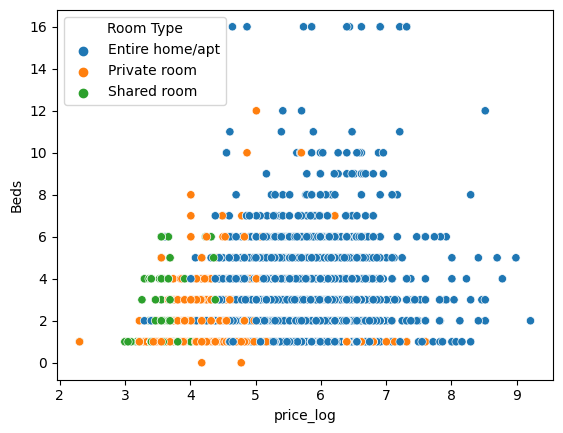

In [143]:
sns.scatterplot(data=airbnb, x='price_log', y='Beds', hue='Room Type')

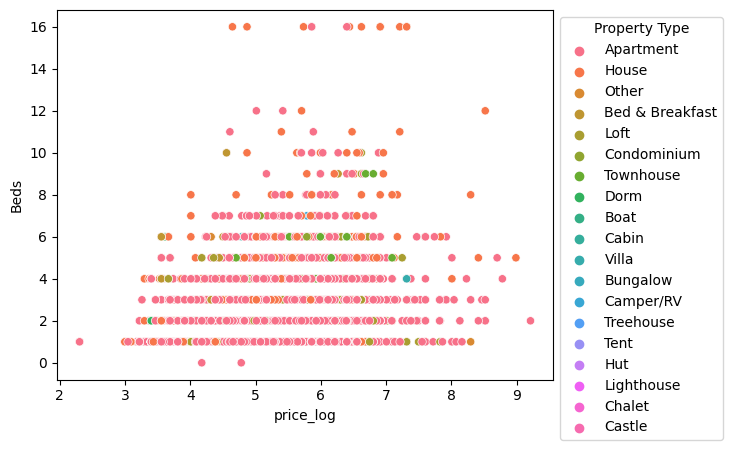

In [145]:
scatplot = sns.scatterplot(data=airbnb, x='price_log', y='Beds', hue='Property Type')
sns.move_legend(scatplot, "upper left", bbox_to_anchor=(1, 1)) # inspired by https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

In [ ]:
# the main patterns I see are that most properties are apartments (followed by houses),
# as well as that renting an entire home is more expensive than a private room, which in turn
# is more expensive than renting a shared room

In [154]:
# describe Price by grouping by both Property Type and Room Type together
# this is a bit hard to read, so I'll answer the next questions by looking at one at a time
airbnb.loc[:,['Price', 'Property Type', 'Room Type']].groupby(['Property Type', 'Room Type']).describe()

Price                                  \
                                   count        mean          std    min   
Property Type   Room Type                                                  
Apartment       Entire home/apt  15669.0  213.224839   218.097834   10.0   
                Private room     10748.0   92.713900    65.237050   10.0   
                Shared room        685.0   79.200000    67.720849   20.0   
Bed & Breakfast Entire home/apt     13.0  184.538462   119.814172   85.0   
                Private room       155.0   97.161290    47.031971   32.0   
                Shared room         12.0  143.666667   245.328104   30.0   
Boat            Entire home/apt      7.0  158.428571    51.110524  100.0   
                Private room         1.0  120.000000          NaN  120.0   
Bungalow        Entire home/apt      4.0  150.750000    46.464144   87.0   
Cabin           Entire home/apt      1.0  250.000000          NaN  250.0   
                Private room         1.0   80.000000          NaN   80.0   
Camper/RV       Entire home/apt      6.0  114.333333   107.685963   45.0   
                Private room         1.0   39.000000          NaN   39.0   
Castle          Private room         1.0  150.000000          NaN  150.0   
Chalet          Private room         1.0   99.000000          NaN   99.0   
Condominium     Entire home/apt     72.0  304.861111   266.197497   80.0   
                Private room        22.0   98.590909    40.576394   46.0   
Dorm            Entire home/apt      4.0   44.250000    24.060687   30.0   
                Private room        16.0   86.562500    40.738137   50.0   
                Shared room         11.0   73.181818    46.328864   30.0   
House           Entire home/apt    752.0  297.263298   468.409428   27.0   
                Private room      1258.0   77.750397    49.402650   25.0   
                Shared room         80.0   77.487500   275.409936   10.0   
Hut             Private room         2.0   75.000000    35.355339   50.0   
Lighthouse      Entire home/apt      1.0   39.000000          NaN   39.0   
Loft            Entire home/apt    392.0  330.510204   321.519721   55.0   
                Private room       312.0  108.057692   128.817912   39.0   
                Shared room         49.0   78.816327    87.521824   30.0   
Other           Entire home/apt     14.0  843.428571  1133.062271   66.0   
                Private room        29.0  211.931034   235.404505   39.0   
                Shared room          4.0  148.750000   134.806961   70.0   
Tent            Private room         4.0  126.250000    94.989034   40.0   
Townhouse       Entire home/apt     83.0  280.783133   314.605252   66.0   
                Private room        52.0   83.365385    30.578109   45.0   
                Shared room          1.0   95.000000          NaN   95.0   
Treehouse       Private room         1.0   95.000000          NaN   95.0   
                Shared room          3.0  167.666667   114.788211   95.0   
Villa           Entire home/apt      4.0  529.750000   650.963581  120.0   
                Private room         4.0  126.250000    71.107313   60.0   

                                                                  
                                    25%    50%      75%      max  
Property Type   Room Type                                         
Apartment       Entire home/apt  135.00  175.0   235.00  10000.0  
                Private room      65.00   82.0   102.00   3000.0  
                Shared room       49.00   66.0    90.00   1000.0  
Bed & Breakfast Entire home/apt  121.00  130.0   220.00    525.0  
                Private room      65.00   85.0   117.00    260.0  
                Shared room       42.50   65.0    81.00    900.0  
Boat            Entire home/apt  122.50  150.0   182.00    250.0  
                Private room     120.00  120.0   120.00    120.0  
Bungalow        Entire home/apt  133.50  160.5   177.75    195.0  
Cabin           Entire home/apt  250.0

In [155]:
airbnb.loc[:,['Price','Property Type']].groupby('Property Type').describe()

Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        27102.0  162.045642  181.376882   10.0   85.00  130.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         94.0  256.585106  249.357946   46.0  131.25  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2090.0  156.722967  307.116948   10.0   60.00   85.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               753.0  221.960159  271.958145   30.0   80.00  140.0   
Other               47.0  394.659574  696.663423   39.0   82.50  135.0   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          136.0  203.933824  264.178901   45.0   89.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                8.0  328.000000  479.888975   60.0  107.50  187.5   

                                  
                    75%      max  
Property Type                     
Apartment        195.00  10000.0  
Bed & Breakfast  125.00    900.0  
Boat             178.50    250.0  
Bungalow         177.75    195.0  
Cabin            207.50    250.0  
Camper/RV        109.00    325.0  
Castle           150.00    150.0  
Chalet            99.00     99.0  
Condominium      298.75   1990.0  
Dorm              80.00    200.0  
House            150.00   8000.0  
Hut               87.50    100.0  
Lighthouse        39.00     39.0  
Loft             240.00   3000.0  
Other            378.00   4000.0  
Tent             175.00    250.0  
Townhouse        206.25   2500.0  
Treehouse        156.00    300.0  
Villa            224.75   1500.0

In [156]:
airbnb.loc[:,['Price','Room Type']].groupby('Room Type').describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

In [157]:
# The highest priced room type on average is an entire home/apartment, and the
# highest priced property type on average is 'Other'

# The room and property types with the highest standard deviation are 'Entire home/apt' and 'Other', respectively

# The median appears to be a more reliable estimate of central tendency. This is because the standard deviations
# for some room and property types are really large, indicating that the data is spread out really widely.
# Seeing how the max value for some room/property types (especially those that have the highest average price) is really large,
# this could indicate outliers that are skewing the average up. So, it might be better to look at the median value.

7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

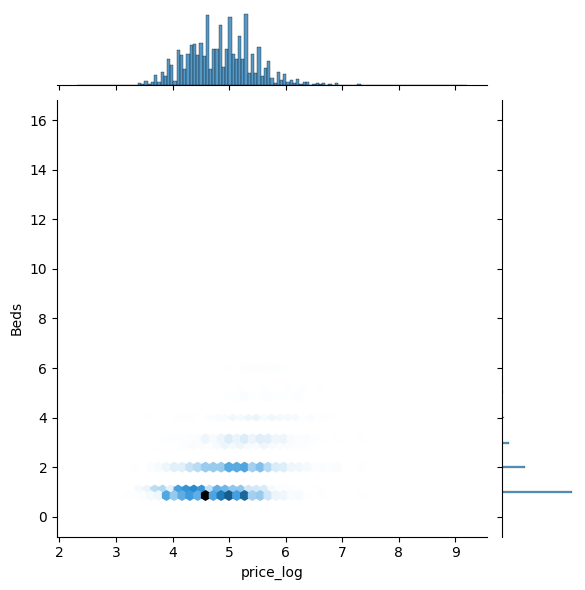

In [158]:
sns.jointplot(x='price_log',y='Beds', data=airbnb, kind='hex')

In [159]:
# The data are mostly clustered in the 4-6 range for price_log and in the 0-4 bedroom range

# This makes it clear that a lot of the scatterplot values in my plots from 5 and 6 were stacked on top of each other
# The scatterplots in 5 and 6, then, over-emphasized outlying values.

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.